In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.metrics import classification_report,mean_absolute_error,r2_score,f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [9]:
hr=pd.read_csv("HR_comma_sep.csv")
X=hr.drop('left',axis=1)
y=hr['left']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)


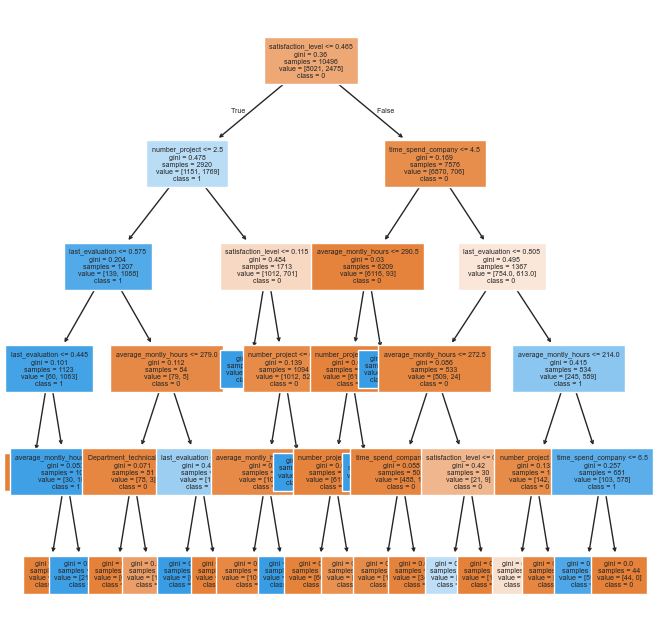

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3407
           1       0.96      0.94      0.95      1092

    accuracy                           0.98      4499
   macro avg       0.97      0.96      0.97      4499
weighted avg       0.98      0.98      0.98      4499



In [18]:
ohe=OneHotEncoder(sparse_output=False,drop='first').set_output(transform="pandas")
trns=make_column_transformer((ohe,make_column_selector(dtype_include=object)),remainder="passthrough",verbose_feature_names_out=False)
trns=trns.set_output(transform="pandas")
X_train_trns=trns.fit_transform(X_train)
X_test_trns=trns.transform(X_test)
dtc=DecisionTreeClassifier(random_state=25,max_depth=5)
dtc.fit(X_train_trns,y_train)
dtc.fit(X_train_trns,y_train)
y_pred=dtc.predict(X_test_trns)
plt.figure(figsize=[8,8])
plot_tree(dtc,feature_names=list(X_train_trns.columns),class_names=['0','1'],filled=True,fontsize=5)
plt.show()
print(classification_report(y_test,y_pred))

In [19]:
scores=[]
depths=[3,4,5,6,7,8,9]
for d in depths:
    dtc=DecisionTreeClassifier(random_state=25,max_depth=d)
    dtc.fit(X_train_trns,y_train)
    y_pred=dtc.predict(X_test_trns)
    scores.append([d,f1_score(y_test,y_pred,pos_label=1)])
df_scores=pd.DataFrame(scores,columns=['depth','score'])
df_scores.sort_values('score',ascending=False)

,depth,score
6,9,0.961718
5,8,0.961682
4,7,0.959775
3,6,0.958353
2,5,0.949861
1,4,0.937874
0,3,0.907713


In [32]:
glass=pd.read_csv("Glass.csv")
y=glass['Type']
X=glass.drop("Type",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
scores=[]
depths=[None,2,3,4,5]
leaves=[1,5,10,20]
splits=[1,5,10,20]
for d in depths:
    for l in leaves:
        for s in splits:
            dtc=DecisionTreeClassifier(random_state=25,max_depth=d,min_samples_leaf=l,min_samples_split=s)
            dtc.fit(X_train_trns,y_train)
            y_pred=dtc.predict(X_test_trns)
            scores.append([d,l,s,f1_score(y_test,y_pred,pos_label=1)])
df_scores=pd.DataFrame(scores,columns=['depth','leaf','split','score'])
df_scores.sort_values('score',ascending=False)

InvalidParameterError: The 'min_samples_split' parameter of DecisionTreeClassifier must be an int in the range [2, inf) or a float in the range (0.0, 1.0]. Got 1 instead.

Building the best model om whole data

In [33]:
best_tree=DecisionTreeClassifier(random_state=25,max_depth=9,min_samples_leaf=1,min_samples_split=2)
X_trf=trns.fit_transform(X)
best_tree.fit(X_trf,y)
df_imp=pd.DataFrame({'feature':list(X_trf.columns),'imp':best_tree.feature_importances_})
df_imp.sort_values('imp',ascending=False)

,feature,imp
2,Mg,0.180161
7,Ba,0.173878
3,Al,0.151796
0,RI,0.142777
6,Ca,0.103473
4,Si,0.100807
1,Na,0.065415
8,Fe,0.051810
5,K,0.029883


In [47]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
glass=pd.read_csv("Glass.csv")
le = LabelEncoder()
y= le.fit_transform( glass['Type'] )
#y= glass['Type']
X=glass.drop("Type",axis=1).astype(float)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
scores=[]
depths=[None,2,3,4,5]
leaves=[2,5,10,20]
splits=[2,5,10,20]

for d in depths:
    for l in leaves:
        for s in splits:
            dtc=DecisionTreeClassifier(random_state=25,max_depth=d,min_samples_leaf=l,min_samples_split=s)
            dtc.fit(X_train,y_train)
            y_pred_prob=dtc.predict_proba(X_test)
            scores.append([d,l,s,log_loss(y_test,y_pred_prob)])
df_scores=pd.DataFrame(scores,columns=['depth','leaf','split','score'])
df_scores.sort_values('score',ascending=True)

,depth,leaf,split,score
31,2.0,20,20,1.627429
30,2.0,20,10,1.627429
29,2.0,20,5,1.627429
28,2.0,20,2,1.627429
12,NaN,20,2,1.932912
...,...,...,...,...
4,NaN,5,2,5.919950
5,NaN,5,5,5.919950
6,NaN,5,10,5.919950
0,NaN,2,2,8.971882


In [48]:
best_tree=DecisionTreeClassifier(random_state=25,max_depth=2,min_samples_leaf=20,min_samples_split=20)
X_trf=trns.fit_transform(X)
best_tree.fit(X,y)
df_imp=pd.DataFrame({'feature':list(X.columns),'imp':best_tree.feature_importances_})
df_imp.sort_values('imp',ascending=False)

,feature,imp
7,Ba,0.618193
3,Al,0.381807
0,RI,0.000000
2,Mg,0.000000
1,Na,0.000000
4,Si,0.000000
5,K,0.000000
6,Ca,0.000000
8,Fe,0.000000
